In [1]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
import scipy.cluster.hierarchy as shc
from sklearn import metrics
import warnings
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
import os
import glob
import re

<h1>Task-1</h1>

In [ ]:
from google.colab import files
upload_files = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv


In [ ]:
#It will print the present working directory
%pwd

'/content'

In [ ]:
#It lists all the files present in the current directory
%ls

#read all csv files into another list
temp_data = sorted(glob.glob('*.{}'.format('csv'))) 

#now we only need the file name that has 'Data' as the filename, filtering it by using regex
r = re.compile(".*Data")
result = sorted(list(filter(r.match, temp_data)))
print('\n')
print(result) #result of the final list which contains only the 'Data' csv files


Data1.csv  Data3.csv  Data5.csv  Data7.csv  sample_data/
Data2.csv  Data4.csv  Data6.csv  Data8.csv


['Data1.csv', 'Data2.csv', 'Data3.csv', 'Data4.csv', 'Data5.csv', 'Data6.csv', 'Data7.csv', 'Data8.csv']


In [ ]:
df_files_data=[] #empty list to append the dataframes into it by reading all the csv files

#for loop to iterate over all the datasets read it into a dataframe
for filename in result:
  df_files_data.append(pd.read_csv(filename,index_col=0)) #appending each dataset into empty list with dataframe data

data_dict={} #empty dict to combine filename and actual data to it by key-value pair

#iterating the for loop to merge two lists as dictonary
for i in range(0,len(result)):
  data_dict[result[i]]=df_files_data[i] #merging two list result and df_files_data as key-value

print(data_dict.get('Data1.csv')) #now we can access all the datasets by just calling with the filename 

           X1        X2        X3  Class
1   -0.063274  0.027734  0.022683      1
2   -0.000731  0.048211  0.069198      1
3   -0.060767 -0.009080  0.053085      1
4    0.013252 -0.011876  0.055324      1
5   -0.054508 -0.003813  0.001738      1
..        ...       ...       ...    ...
208  0.175738 -0.053478 -2.733752      7
209  0.396046 -0.858377 -3.126866      7
210 -0.406362 -0.334541 -2.885598      7
211 -0.299275  0.071281 -3.642585      7
212 -0.506192  0.433538 -2.608597      7

[212 rows x 4 columns]


In [ ]:
#Task-1 -> 1A Finding k-means and hierarical prediction
#calculating the k-means and aggolometarative(hierarical) clusturing for all the datasets


#km_predicted_class -> K-means Predicted Class
#am_predicted_class -> Agglomerative or Hierarical Predicted Class
#enumerating the data dict to predict the k-means and hirearical clusturing
for i,(key,item) in enumerate(data_dict.items()):
  #here checking the length of columns weather it has 2 datapoints with actual class or 3 datapoints with actual class,
  #based on that we are predicting the k-means and hierarical
  if(len(item.columns)==3):

    #k-means cluster initiation with n-clusters as unique classes present in the actual class column
    kmeans_cluster = KMeans(n_clusters=item['Class'].nunique(), random_state=42, max_iter=100)
    #passing the 2 data points to the fit function to predict
    kmeans_cluster.fit(item.iloc[:,0:2])
    #predicted class is assigned to the newly 'km_predicted_class' created column
    item['km_predicted_class']=kmeans_cluster.labels_ 

    #Agglomerative cluster initiation with n-clusters as unique classes present in the actual class column
    hierarchical_cluster = AgglomerativeClustering(n_clusters=item['Class'].nunique(), affinity='euclidean', linkage='ward')
    #passing the 2 data points to the fit function to predict
    hierarchical_cluster.fit(item.iloc[:,0:2])
    #predicted class is assigned to the newly 'am_predicted_class' created columns
    item['am_predicted_class']=hierarchical_cluster.labels_

  elif(len(item.columns)==4): #enters into this loop when it has 3 datapoints and 1 class

    #k-means cluster initiation with n-clusters as unique classes present in the actual class column
    kmeans_cluster = KMeans(n_clusters=item['Class'].nunique(), random_state=42, max_iter=100)
    #passing the 3 data points to the fit function to predict
    kmeans_cluster.fit(item.iloc[:,0:3])
    #predicted class is assigned to the newly 'km_predicted_class' created column
    item['km_predicted_class']=kmeans_cluster.labels_ 

    #Agglomerative cluster initiation with n-clusters as unique classes present in the actual class column
    hierarchical_cluster = AgglomerativeClustering(n_clusters=item['Class'].nunique(), affinity='euclidean', linkage='ward')
    #passing the 3 data points to the fit function to predict
    hierarchical_cluster.fit(item.iloc[:,0:3])
    #predicted class is assigned to the newly 'am_predicted_class' created columns
    item['am_predicted_class']=hierarchical_cluster.labels_

In [ ]:
#Task-1 -> 1B Performance metrics
#Calculating the accuracy score, f1 score, precision and recall by using metrics passing actual class and predicted class
warnings.filterwarnings('ignore') #this line ignores the warnings in the output

#the below empty lists are used to calculate the perfomance metrics for k-means and hierarical clustering
km_accuracy_score = []
km_f1_score_result = []
km_precision_score = []
km_recall_score = []
am_accuracy_score = []
am_f1_score_result = []
am_precision_score = []
am_recall_score = []

#calucalting the accuracy,precision and recall score for all the datasets using metrics library
for idx,(key,item) in enumerate(data_dict.items()):
  # calculating kmeans metrics
  km_accuracy_score.append(metrics.accuracy_score(data_dict[key]['Class'],data_dict[key]['km_predicted_class']))
  km_precision_score.append(metrics.precision_score(data_dict[key]['Class'],data_dict[key]['km_predicted_class'],average='micro'))
  km_recall_score.append(metrics.recall_score(data_dict[key]['Class'],data_dict[key]['km_predicted_class'],average='micro'))
  # calculating hierarical metrics
  am_accuracy_score.append(metrics.accuracy_score(data_dict[key]['Class'],data_dict[key]['am_predicted_class']))
  am_precision_score.append(metrics.precision_score(data_dict[key]['Class'],data_dict[key]['am_predicted_class'],average='micro'))
  am_recall_score.append(metrics.recall_score(data_dict[key]['Class'],data_dict[key]['am_predicted_class'],average='micro'))

#formula for F1_score = 2 * (precision * recall) / (precision + recall)

#calculating the f1_score for k-means-data
for i in range(0,len(km_accuracy_score)):
  km_f1_result = 2*(km_precision_score[i]*km_recall_score[i])/(km_precision_score[i]+km_recall_score[i])
  km_f1_score_result.append(km_f1_result)
km_f1_score_result = [0 if pd.isna(x) else x for x in km_f1_score_result]

#calculating f1_score for hierarical(agglomerative)-data
for i in range(0,len(am_accuracy_score)):
  am_f1_result = 2*(am_precision_score[i]*am_recall_score[i])/(am_precision_score[i]+am_recall_score[i])
  am_f1_score_result.append(am_f1_result)
am_f1_score_result = [0 if pd.isna(x) else x for x in am_f1_score_result]

#Performance metrics of kmeans
col_names = ['Filename','kmeans_accuracy_score','kmeans_f1_score']
#creating a dataframe with all the metrics of kmeans
kmeans_perf_metrics = pd.DataFrame(list(zip(result,km_accuracy_score,km_f1_score_result)),columns=col_names)
print("K-means Performance metrics of all the datasets\n")
print(kmeans_perf_metrics)
print('\n')
#performance metrice of hierarical clusturing
col_names = ['Filename','hierarical_accuracy_score','hierarical_f1_score']
#creating a dataframe with all the metrics of agglomerative
print("Hierarical(Agglomerative) Performance metrics of all the datasets \n")
hierarical_perf_metrics = pd.DataFrame(list(zip(result,am_accuracy_score,am_f1_score_result)),columns=col_names)
print(hierarical_perf_metrics)

K-means Performance metrics of all the datasets

    Filename  kmeans_accuracy_score  kmeans_f1_score
0  Data1.csv               0.141509         0.141509
1  Data2.csv               0.000000         0.000000
2  Data3.csv               0.000000         0.000000
3  Data4.csv               0.173000         0.173000
4  Data5.csv               0.217500         0.217500
5  Data6.csv               0.011230         0.011230
6  Data7.csv               0.605195         0.605195
7  Data8.csv               0.000000         0.000000


Hierarical(Agglomerative) Performance metrics of all the datasets 

    Filename  hierarical_accuracy_score  hierarical_f1_score
0  Data1.csv                   0.000000             0.000000
1  Data2.csv                   0.324257             0.324257
2  Data3.csv                   0.250000             0.250000
3  Data4.csv                   0.299000             0.299000
4  Data5.csv                   0.157500             0.157500
5  Data6.csv                   0.00781

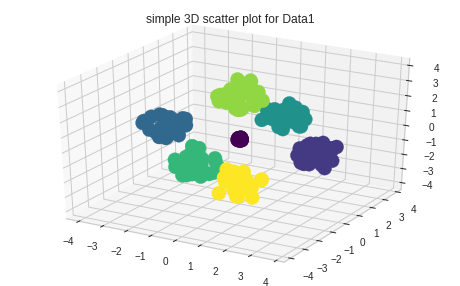

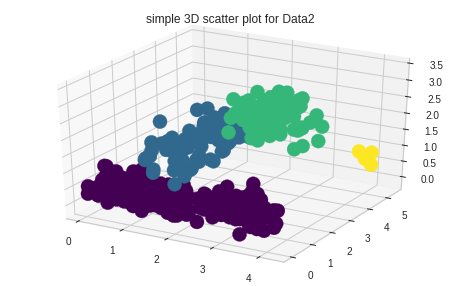

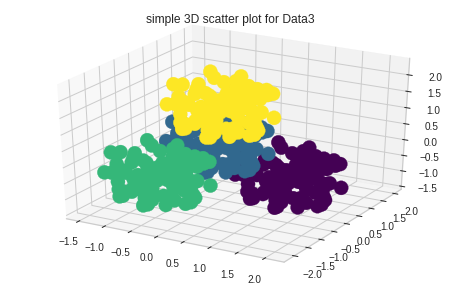

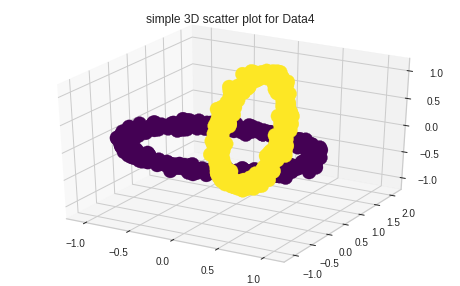

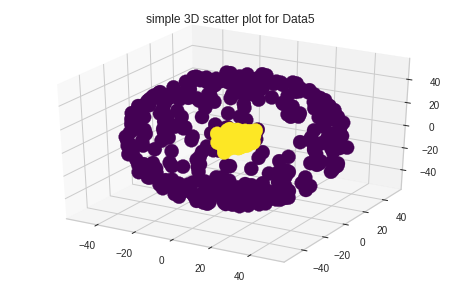

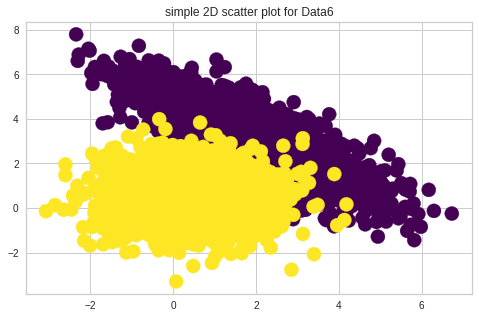

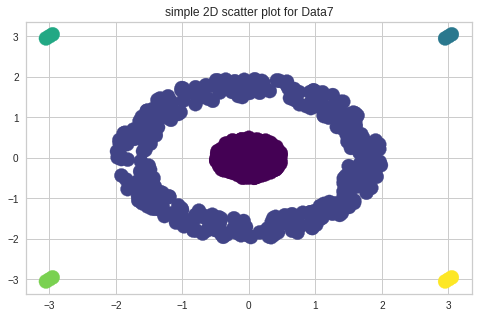

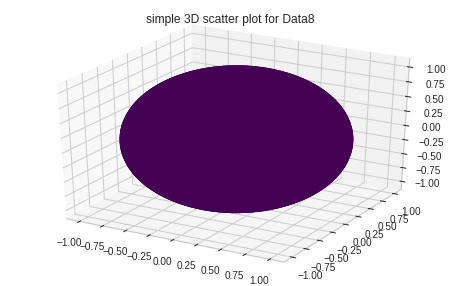

In [ ]:
#Task-1 -> 1C - Plotting the graphs using Actual Class

#enumerating the data dict to plot the 2D or 3D graphs with existing class
for i,(key,item) in enumerate(data_dict.items()):
  #here checking the length of columns weather it has 2 datapoints with 3 classes(actual, km-class, am-class)s or 3 datapoints with 3 classes(actual, km-class, am-class)
  #checking this condition to plot either 2D or 3D graph based on the given data
  if(len(item.columns)==5): #enters into the loop if it has 5 columns(2 datapoints + 3 classes) in the dataframe to plot 2D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    # Creating plot
    plt.scatter(item.iloc[:,0], item.iloc[:,1], c=item.iloc[:,2],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the actual class using iloc
    plt.title("simple 2D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()
  elif(len(item.columns)==6):#enters into the loop if it has 6 columns(3 datapoints + 3 classes) in the dataframe to plot 3D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    ax = plt.axes(projection ="3d")
    # Creating plot
    ax.scatter3D(item.iloc[:,0], item.iloc[:,1],item.iloc[:,2], c=item.iloc[:,3],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the actual class using iloc
    plt.title("simple 3D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()

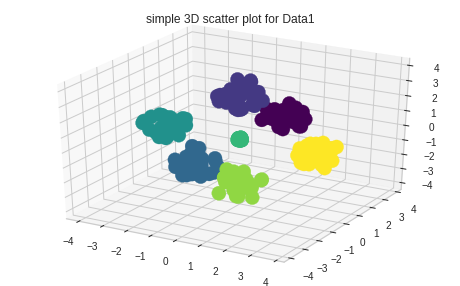

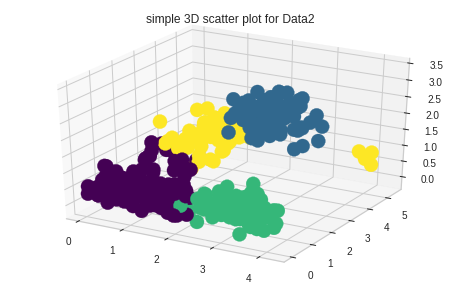

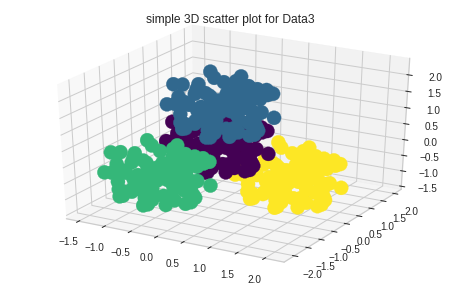

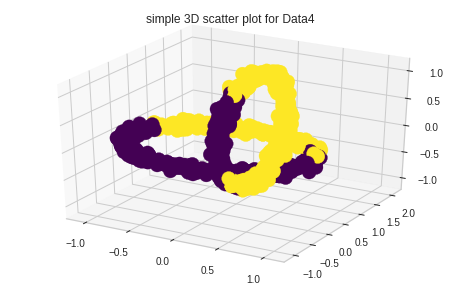

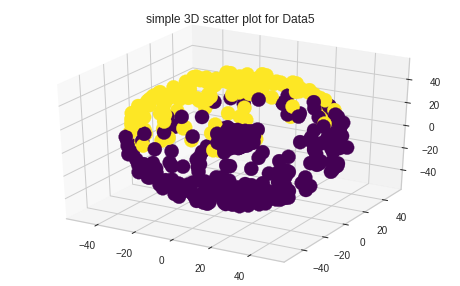

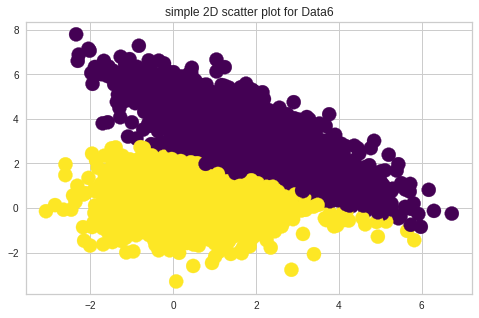

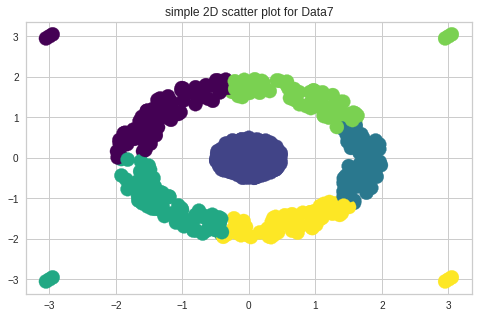

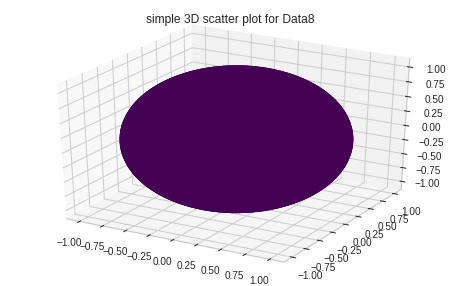

In [ ]:
#Task-1 -> 1D - Using Kmeans Predicted class
#Plotting graphs for the predicted class of k-means datasets

##enumerating the data dict to plot the 2D or 3D graphs with predicted kmeans class
for i,(key,item) in enumerate(data_dict.items()):

  #checking this condition to plot either 2D or 3D graph based on the given data
  if(len(item.columns)==5):#enters into the loop if it has 5 columns(2 datapoints + 3 classes) in the dataframe to plot 2D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    # Creating plot
    plt.scatter(item.iloc[:,0], item.iloc[:,1], c=item.iloc[:,3],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the kmeans class column position using iloc
    plt.title("simple 2D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()

  elif(len(item.columns)==6): #enters into the loop if it has 6 columns(3 datapoints + 3 classes) in the dataframe to plot 3D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    ax = plt.axes(projection ="3d")
    # Creating plot
    ax.scatter3D(item.iloc[:,0], item.iloc[:,1],item.iloc[:,2], c=item.iloc[:,4],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the kmeans class column position using iloc
    plt.title("simple 3D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()

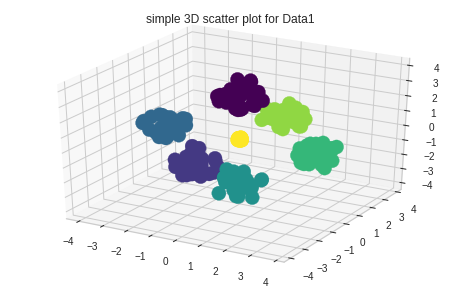

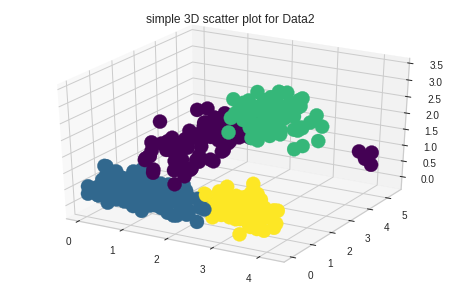

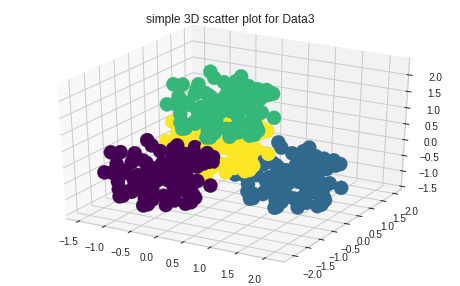

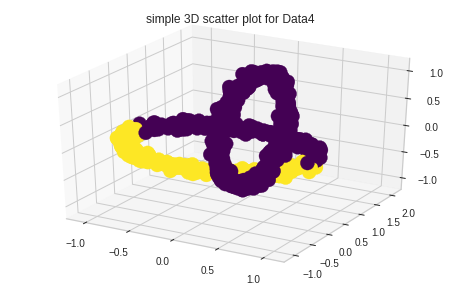

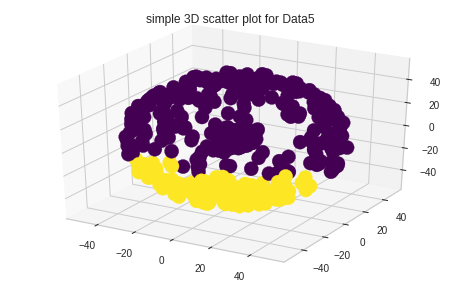

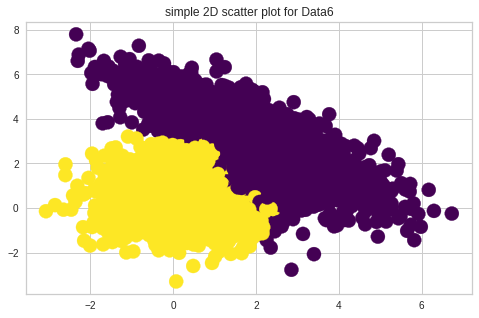

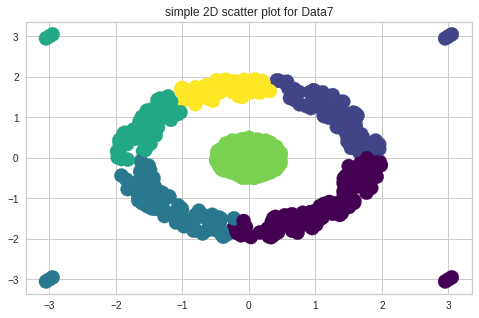

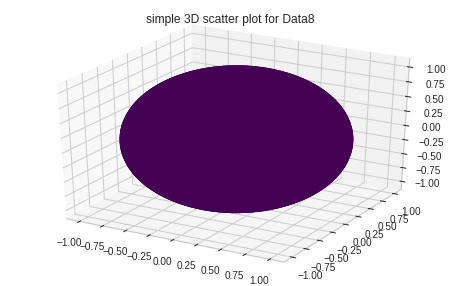

In [ ]:
#Task-1 -> 1D - Using Hierarical Predicted class
#Plotting graphs for the predicted class of hierarical clustering on datasets

##enumerating the data dict to plot the 2D or 3D graphs with predicted hierarical class
for i,(key,item) in enumerate(data_dict.items()):
  #checking this condition to plot either 2D or 3D graph based on the given data
  if(len(item.columns)==5): #enters into the loop if it has 5 columns(2 datapoints + 3 classes) in the dataframe to plot 2D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    # Creating plot
    plt.scatter(item.iloc[:,0], item.iloc[:,1], c=item.iloc[:,4],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the hierarical class column position using iloc
    plt.title("simple 2D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()
  elif(len(item.columns)==6): #enters into the loop if it has 6 columns(3 datapoints + 3 classes) in the dataframe to plot 3D graph
    # Creating figure
    fig = plt.figure(figsize = (8, 5))
    ax = plt.axes(projection ="3d")
    # Creating plot
    ax.scatter3D(item.iloc[:,0], item.iloc[:,1],item.iloc[:,2], c=item.iloc[:,5],s=200, alpha=1,cmap='viridis') #here for the 'color' attribute I'm passing the hierarical class column position using iloc
    plt.title("simple 3D scatter plot for Data"+str(i+1))
    # show plot
    plt.show()

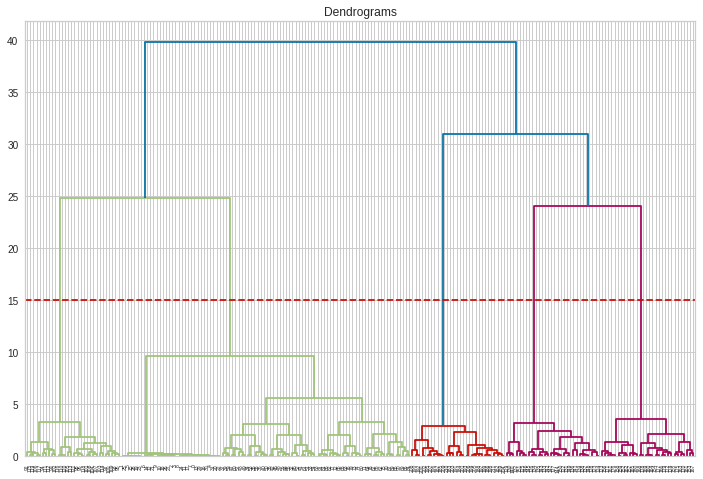

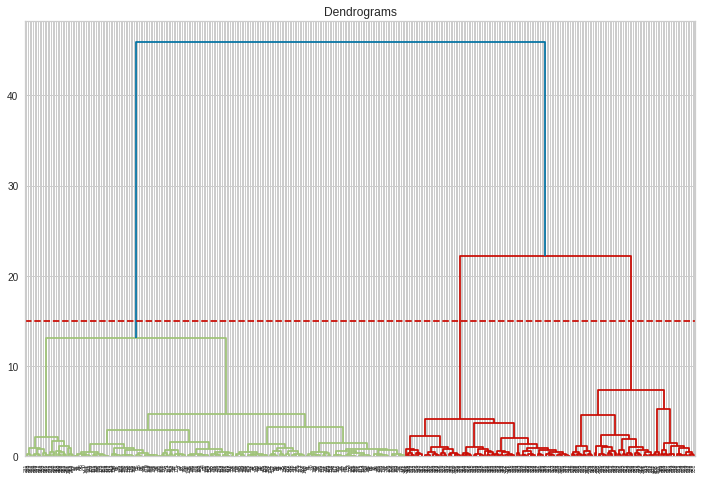

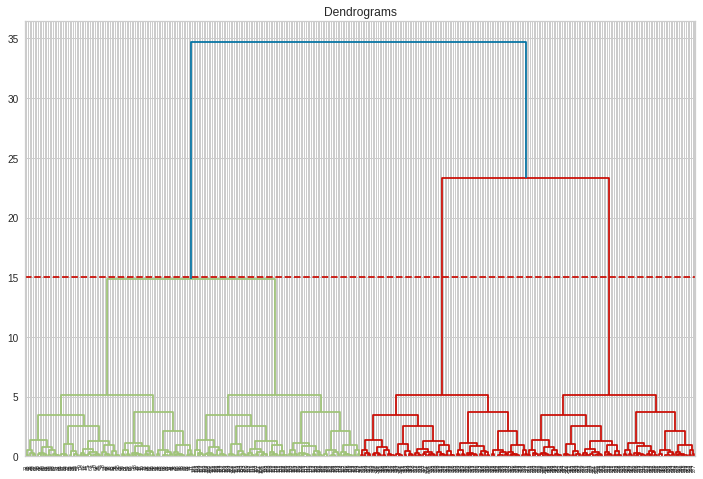

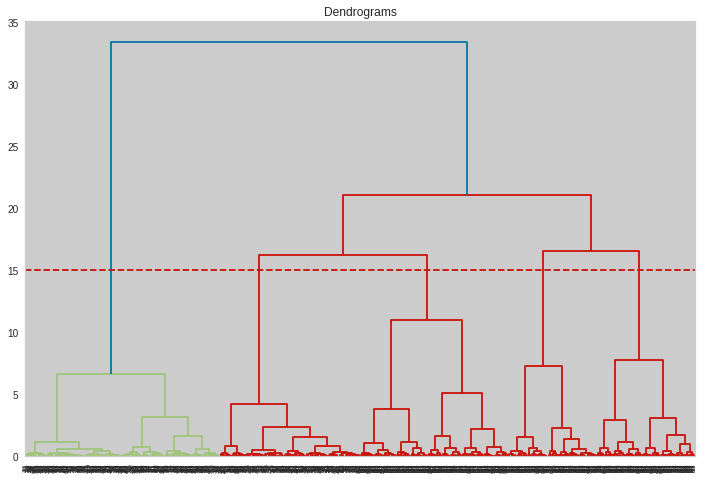

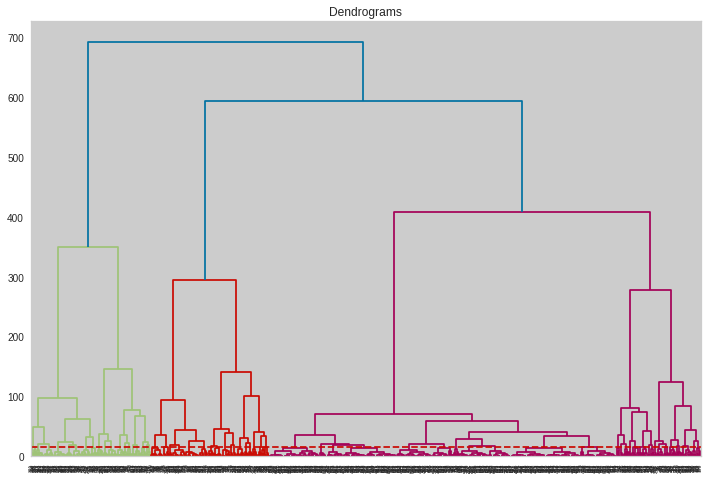

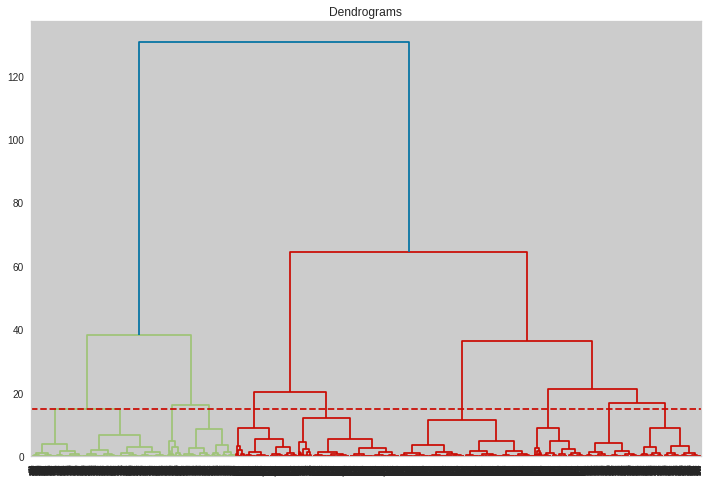

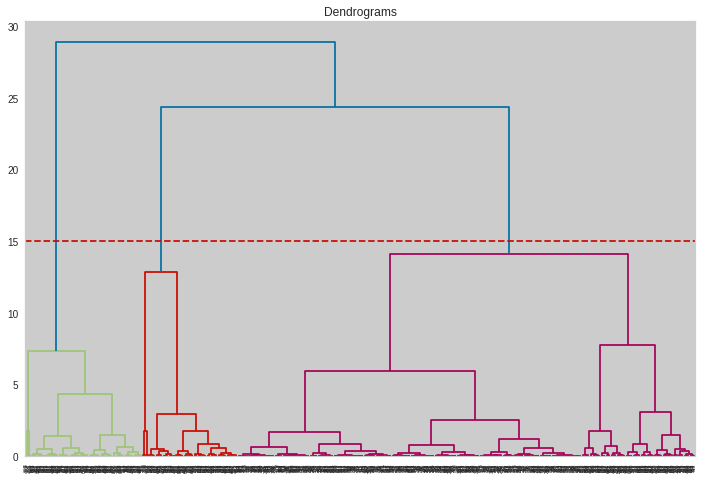

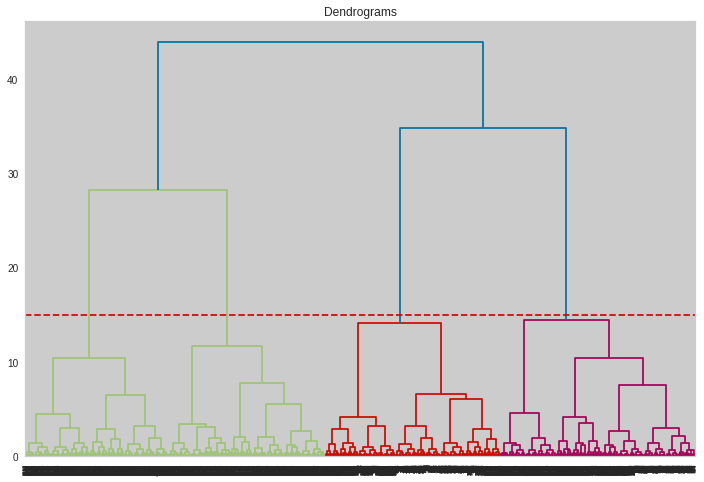

In [ ]:
#Task 1.1B hierarchical clustering methods to generate cluster using dendogram method

##enumerating the data dict to plot the dendograms
for item in data_dict.values():

  if(len(item.columns)==5): #enters into the loop if it has 5 columns(2 datapoints + 3 classes) 
    # Creating figure
    fig = plt.figure(figsize = (12, 8))
    plt.title("Dendrograms")  
    shc.dendrogram(shc.linkage(item.iloc[:,1:3], method='ward')) #iloc 1 to 3 means considering column 1 and column 2
    plt.axhline(y=15, color='r', linestyle='--')
  elif(len(item.columns)==6): #enters into the loop if it has 6 columns(3 datapoints + 3 classes) 
    # Creating figure
    fig = plt.figure(figsize = (12, 8))
    plt.title("Dendrograms")  
    shc.dendrogram(shc.linkage(item.iloc[:,1:4], method='ward')) #iloc 1 to 4 means considering column 1, column 2, column 3
    plt.axhline(y=15, color='r', linestyle='--')
# print("\n1.1B HIERARCHICAL CLUSTERING OF DATA 1\n")


In [ ]:
!jupyter nbconvert --to html project_1_task_1.ipynb

[NbConvertApp] Converting notebook project_1_task_1.ipynb to html
[NbConvertApp] Writing 1824736 bytes to project_1_task_1.html
